<a href="https://colab.research.google.com/github/poojan504/Computer-Vision-with-Deep-Learning/blob/master/ShallowNetforMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow 
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Load Data

In [6]:
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Preprocessing of the data

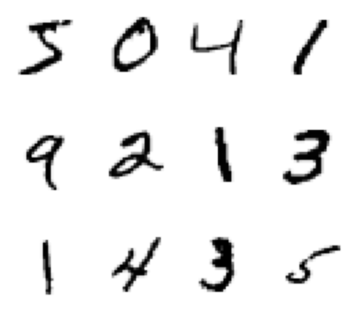

In [9]:
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(3,4,k+1)
  plt.imshow(x_train[k],cmap = 'Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()


we are going to turn the pixel values from the 0 to 255 to 0 to 1. for the purpose of mean to 0 and std to 1

In [10]:
x_train = x_train.reshape(60000,784).astype('float32')
x_valid = x_valid.reshape(10000,784).astype('float32')

In [25]:
x_train.shape

(60000, 784)

In [11]:
x_train /= 255
x_valid /= 255

convert the training labels from int to one hot coded

In [13]:
n_classes = 10
y_train = to_categorical(y_train,n_classes)
y_valid = to_categorical(y_valid,n_classes)

In [14]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Design the Nueral Network Architecture

In [19]:
model = Sequential()
#hidden layer
model.add(Dense(64,activation='sigmoid',input_shape =(784,)))
#output layer
model.add(Dense(10,activation ='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [21]:
model.compile(loss = 'mean_squared_error',optimizer = SGD(lr = 0.01),metrics =['accuracy'])

Train the model

In [22]:
model.fit(x_train,y_train,batch_size=128,epochs =200,verbose =1, validation_data=(x_valid,y_valid))

Epoch 1/200
469/469 [==============================] - 4s 6ms/step - loss: 0.0924 - accuracy: 0.0830 - val_loss: 0.0920 - val_accuracy: 0.0736
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0916 - accuracy: 0.0751 - val_loss: 0.0914 - val_accuracy: 0.0742
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0910 - accuracy: 0.0859 - val_loss: 0.0909 - val_accuracy: 0.0885
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0906 - accuracy: 0.1016 - val_loss: 0.0904 - val_accuracy: 0.1083
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.1176 - val_loss: 0.0900 - val_accuracy: 0.1259
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0898 - accuracy: 0.1339 - val_loss: 0.0897 - val_accuracy: 0.1438
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0895 - accuracy: 0.1537 - val_loss: 0.0893 - val_accuracy: 0.1620

Evaluating the model Performance

In [23]:
model.evaluate(x_valid,y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0276 - accuracy: 0.8672


[0.027582217007875443, 0.8672000169754028]

Performing inferenece

In [24]:
valid_0 = x_valid[0].reshape(1,784)

In [28]:
model.predict(valid_0)

1/1 [==============================] - 0s 37ms/step


array([[5.0206743e-03, 1.8051104e-03, 2.9426112e-03, 7.8679966e-03,
        6.0069636e-03, 8.6007137e-03, 9.0740813e-04, 9.2133307e-01,
        4.4828700e-03, 4.1032534e-02]], dtype=float32)

In [48]:
print(x_valid[:,1])

[0. 0. 0. ... 0. 0. 0.]


In [49]:
from re import X
prediction = model.predict(x_valid)
for i in range(10000):
  print("prediction: Class:{} has probabilty of {}:".format(prediction[i].argmax(), prediction[i].max()))

Streaming output truncated to the last 5000 lines.
prediction: Class:3 has probabilty of 0.5644586682319641:
prediction: Class:4 has probabilty of 0.48082178831100464:
prediction: Class:9 has probabilty of 0.6036850214004517:
prediction: Class:8 has probabilty of 0.851829469203949:
prediction: Class:4 has probabilty of 0.8020462989807129:
prediction: Class:1 has probabilty of 0.8709957599639893:
prediction: Class:0 has probabilty of 0.7839629054069519:
prediction: Class:6 has probabilty of 0.9168996810913086:
prediction: Class:0 has probabilty of 0.806644856929779:
prediction: Class:4 has probabilty of 0.4853419363498688:
prediction: Class:6 has probabilty of 0.8913198113441467:
prediction: Class:8 has probabilty of 0.4158509075641632:
prediction: Class:6 has probabilty of 0.8886913657188416:
prediction: Class:1 has probabilty of 0.8542230129241943:
prediction: Class:1 has probabilty of 0.8597919940948486:
prediction: Class:4 has probabilty of 0.5022990703582764:
prediction: Class:8 ha